In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "Change_2022_Google Analytics Ma.xlsx"
df = pd.read_excel(file_path)

# Display basic information about the dataset
print(df.info())
print("\nSample data:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47529 entries, 0 to 47528
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   City, Country            47529 non-null  object        
 1   Audience                 47140 non-null  object        
 2   Campaign                 47529 non-null  object        
 3   Date                     47529 non-null  datetime64[ns]
 4   Platform                 47528 non-null  object        
 5   Ad Format                29519 non-null  object        
 6   Creative - Family        47529 non-null  object        
 7   Creative - Version       47529 non-null  object        
 8   Total Sessions           47529 non-null  int64         
 9   Days away from max date  47529 non-null  int64         
 10  Latest report?           47529 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 4.0+ MB
None

Sample data:
          

<ipython-input-16-2a5188ca7617>:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df.describe(include='all'))


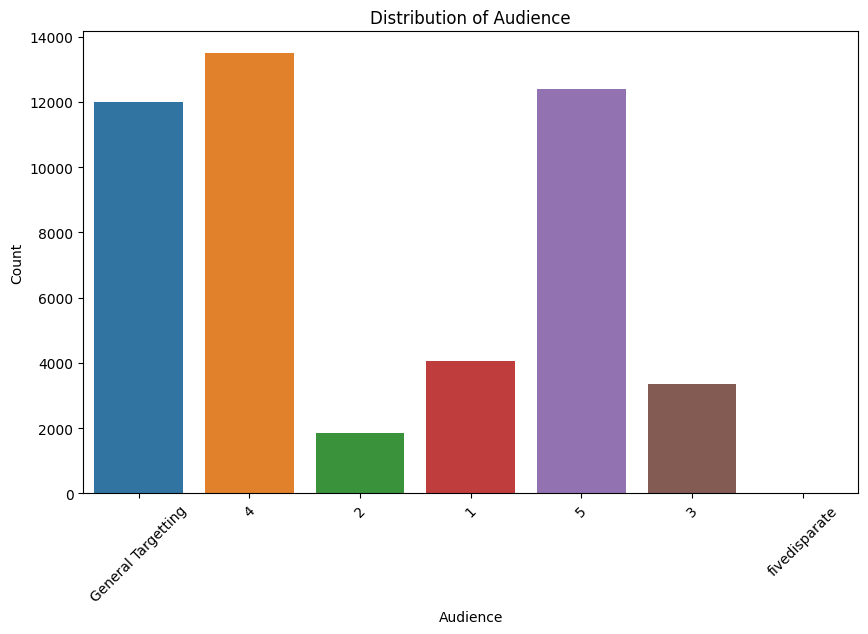

In [17]:
# Data visualization

# Countplot of Audience
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Audience')
plt.title('Distribution of Audience')
plt.xlabel('Audience')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




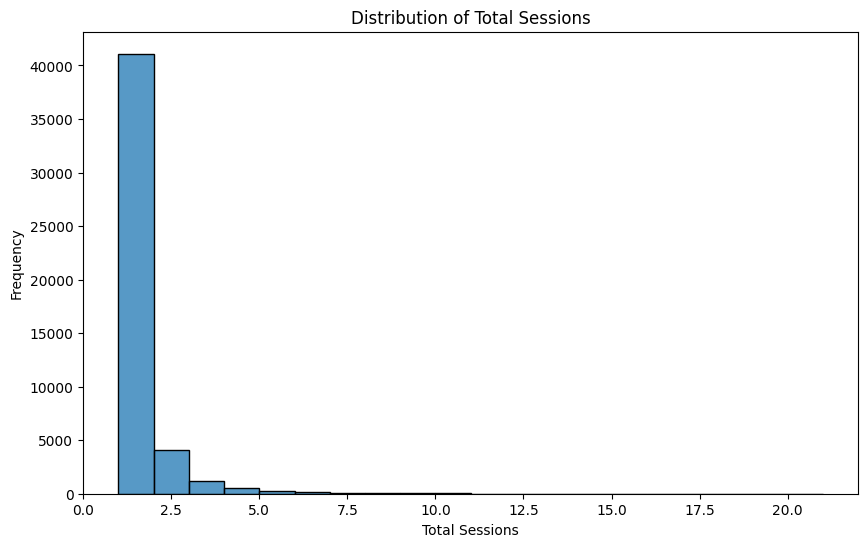

In [18]:
# Histogram of Total Sessions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Sessions', bins=20)
plt.title('Distribution of Total Sessions')
plt.xlabel('Total Sessions')
plt.ylabel('Frequency')
plt.show()



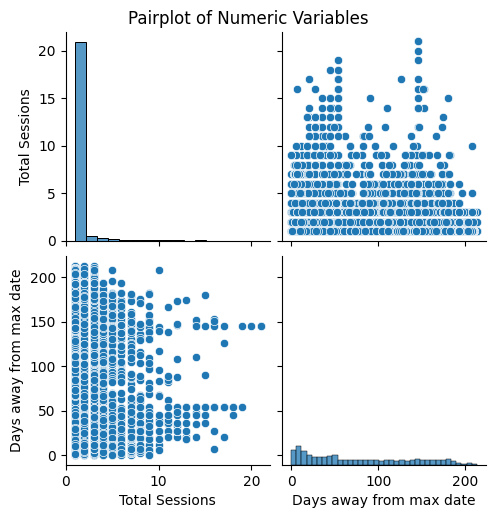

In [19]:
# Pairplot for numeric variables
numeric_columns = ['Total Sessions', 'Days away from max date']
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairplot of Numeric Variables", y=1.02)
plt.show()



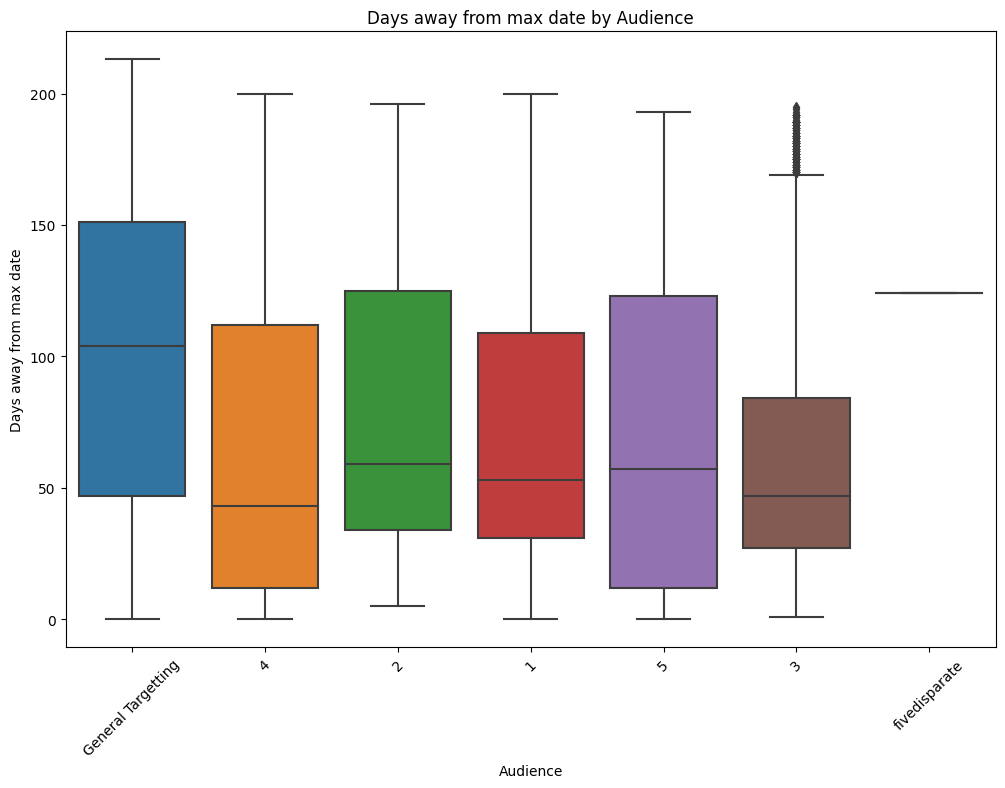

In [20]:
# Boxplot of Days away from max date by Audience
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Audience', y='Days away from max date')
plt.title('Days away from max date by Audience')
plt.xlabel('Audience')
plt.ylabel('Days away from max date')
plt.xticks(rotation=45)
plt.show()



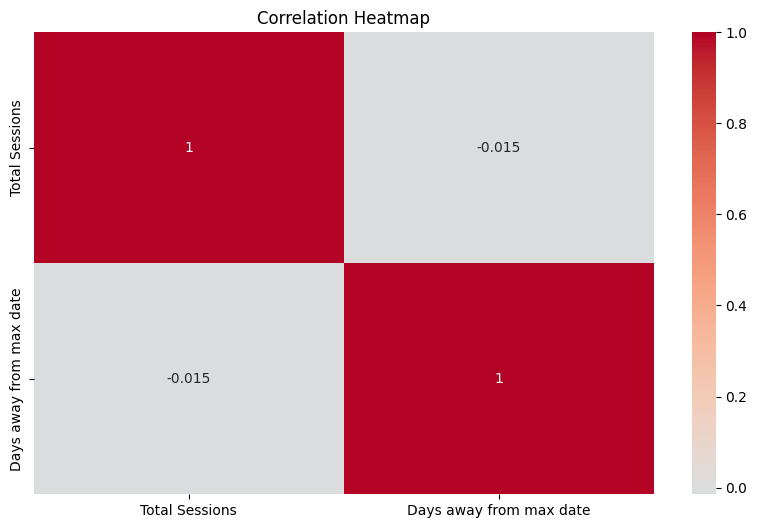

In [21]:
#  Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "Change_2022_Google Analytics Ma.xlsx"
df = pd.read_excel(file_path)

# Preprocessing: Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['City, Country', 'Audience', 'Campaign', 'Platform', 'Ad Format',
                                         'Creative - Family', 'Creative - Version', 'Latest report?'])

# Remove the "Date" column and "Total Sessions" which is the target variable
X = df_encoded.drop(['Total Sessions', 'Date'], axis=1)
y = df_encoded['Total Sessions']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.94
R-squared: 0.17


**Mean Squared Error (MSE): 0.94**

The Mean Squared Error is a measure of the average squared difference between the predicted values and the actual values. It quantifies the overall quality of the model's predictions. A lower MSE indicates better model performance. In your case, an MSE of 0.94 suggests that, on average, the squared difference between predicted and actual values is 0.94, which might be considered relatively high.

**R-squared (R2): 0.17**

The R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable (Total Sessions) that can be explained by the independent variables (features) in the model. It ranges from 0 to 1, where higher values indicate a better fit of the model to the data. An R-squared value of 0.17 indicates that only about 17% of the variance in the Total Sessions can be explained by the features included in the model. This suggests that the linear regression model might not be capturing the underlying relationships well.

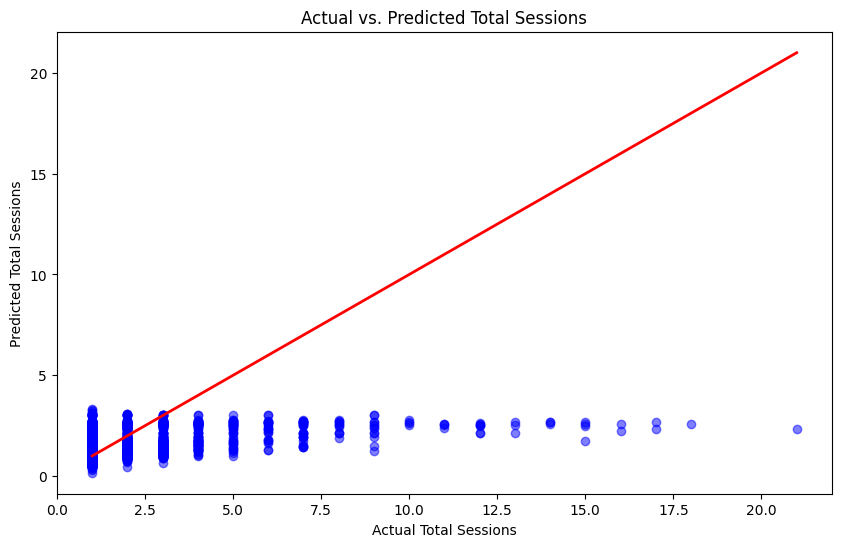

In [12]:
import matplotlib.pyplot as plt

# Plotting the predicted values vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs. Predicted Total Sessions')
plt.xlabel('Actual Total Sessions')
plt.ylabel('Predicted Total Sessions')
plt.show()



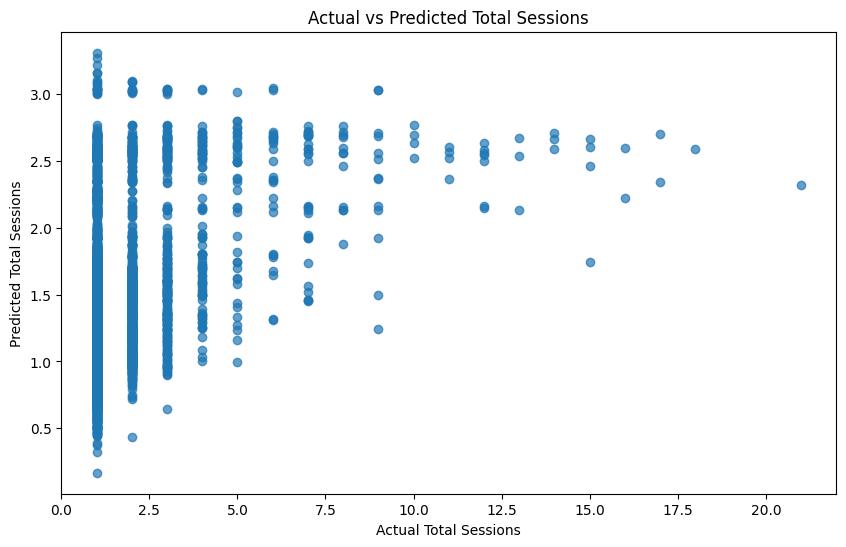

In [13]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Total Sessions')
plt.ylabel('Predicted Total Sessions')
plt.title('Actual vs Predicted Total Sessions')
plt.show()


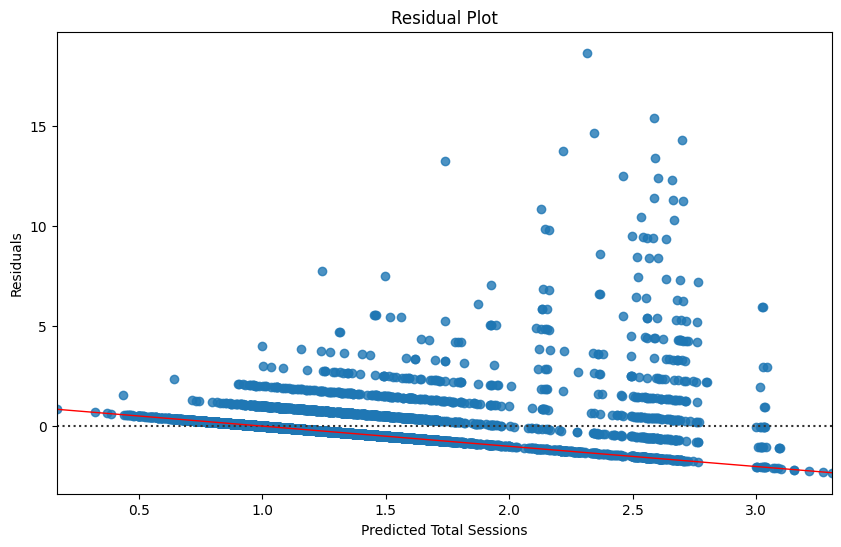

In [15]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Total Sessions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
